In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A-100123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A-100123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# //from google.colab import drive
# //drive.mount('/content/drive/MyDrive/spam.csv')

In [5]:
df = pd.read_csv('spam_ham_dataset.csv')

In [7]:
df.shape

(5171, 4)

Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
for col in df.columns:
    print(col)


Unnamed: 0
label
text
label_num


In [10]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
columns_to_drop = ['Unnamed: 0', 'label_num']
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [15]:
df.rename(columns={'text':'message', 'label':'message_type'},inplace=True)

In [16]:
df.sample(5)

,message_type,message
3066,spam,"Subject: jurirne get latest softwares , 99 % s..."
4557,ham,Subject: ces - duke en field services\r\nthe p...
2644,ham,Subject: unify close schedule\r\nthe following...
2564,ham,"Subject: vastar / big thicket\r\nanita ,\r\npe..."
4552,ham,"Subject: koch midstream services\r\nfyi , i wa..."


In [17]:
df.isnull().sum()

message_type    0
message         0
dtype: int64

In [18]:
df.duplicated().sum()

178

In [19]:
df= df.drop_duplicates()
df.duplicated().sum()

0

In [20]:
df = df.fillna(0)

In [44]:
#df['message_type'] = df['message_type'].astype('int64')
#display(df.dtypes)
#df['message_type'] = df['message_type'].astype(float)
#display(df.dtypes)

ValueError: could not convert string to float: 'ham'

Exploratory Data Analysis

In [23]:
df['message_type'].value_counts()

message_type
ham     3531
spam    1462
Name: count, dtype: int64

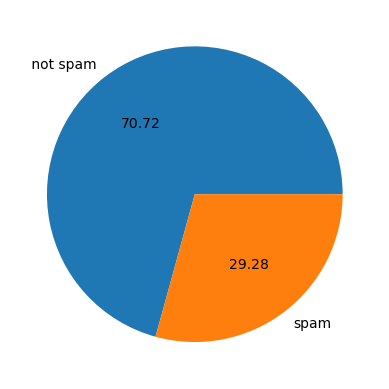

ValueError: could not convert string to float: 'ham'

In [31]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()
#colours=["red","black"]
sns.countplot(df['message_type'])
figure(figsize=(12,6))
countplot(data=df,x=message_type,palette=colours)
show()

In [28]:
#find the number of alpha numeric characters in the messages column
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,spam,"Subject: photoshop , windows , office . cheap ...",414
4,ham,Subject: re : indian springs\r\nthis deal is t...,336


In [29]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Subject, :, enron, methanol, ;, meter, #, :, ...
1       [Subject, :, hpl, nom, for, january, 9, ,, 200...
2       [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3       [Subject, :, photoshop, ,, windows, ,, office,...
4       [Subject, :, re, :, indian, springs, this, dea...
                              ...                        
5165    [Subject, :, fw, :, crosstex, energy, ,, drisc...
5166    [Subject, :, put, the, 10, on, the, ft, the, t...
5167    [Subject, :, 3, /, 4, /, 2000, and, following,...
5169    [Subject, :, industrial, worksheets, for, augu...
5170    [Subject, :, important, online, banking, alert...
Name: message, Length: 4993, dtype: object

In [30]:
#now find the length of each of the list to get the total number of words in each list
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
2205,spam,Subject: explore good - featured super viagrla...,769,174
2047,ham,Subject: sitara availability\r\nas a precautio...,460,86
930,spam,Subject: no risk kiosk pg lnbcer\r\nhey\r\nguy...,176,28
4790,ham,Subject: nom for 2 / 28 and 2 / 29 - hpl deliv...,615,150
4861,ham,Subject: enron astroworld tickets\r\nenron ann...,1303,231


In [32]:
#finding number of sentences
df['num_sentences']=df['message'].apply(lambda x: nltk.sent_tokenize(x))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
1610,ham,Subject: fw : lisa ' s # ' s\r\n- - - - - orig...,1239,308,[Subject: fw : lisa ' s # ' s\r\n- - - - - ori...
3404,ham,"Subject: hpl noms for june 08 , 2000\r\n( see ...",94,24,"[Subject: hpl noms for june 08 , 2000\r\n( see..."
204,ham,Subject: 98 - 0432\r\ncan you please extend si...,269,66,[Subject: 98 - 0432\r\ncan you please extend s...
3146,ham,"Subject: enron / hpl actuals for sept . 14 , 2...",128,32,"[Subject: enron / hpl actuals for sept ., 14 ,..."
3584,ham,Subject: calpine daily gas nomination\r\nwe ar...,384,76,[Subject: calpine daily gas nomination\r\nwe a...


In [33]:
#finding no. of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
2213,spam,"Subject: usb charset = us - ascii "" >\r\nt o d...",2419,480,42
1557,ham,Subject: 1 / 00 allocations\r\nattached is the...,130,27,2
2890,ham,Subject: revised noms - four square gas\r\ndar...,207,48,2
1657,ham,Subject: first deliveries - comstock oil & gas...,91,17,1
257,spam,Subject: your specialist ' s appointment start...,2983,532,24


In [34]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [35]:
# lets check describe() for both ham and spam individually
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [36]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


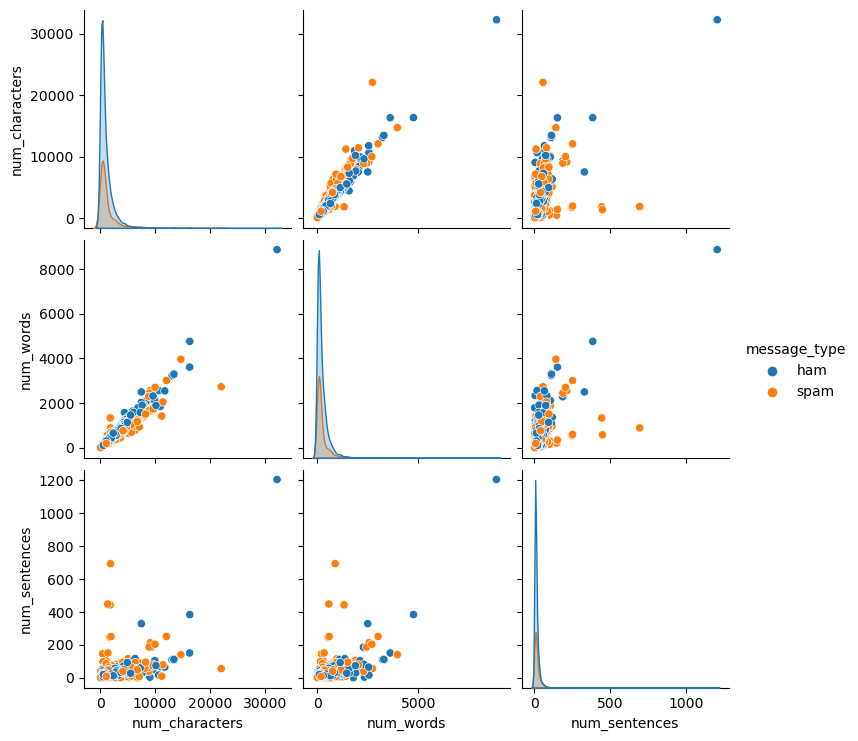

In [37]:
sns.pairplot(df,hue='message_type')

In [46]:
#df['message_type'] = df['message_type'].astype(float)
df['message_type'] = pd.to_numeric(df['message_type'], errors='coerce')
display(df.dtypes)

message_type      float64
message            object
num_characters      int64
num_words           int64
num_sentences       int64
dtype: object

In [49]:
#find correlation
df.dropna(subset=['message_type'], inplace=True)
df.corr()

,message_type,message,num_characters,num_words,num_sentences
message_type,NaN,NaN,NaN,NaN,NaN
message,NaN,NaN,NaN,NaN,NaN
num_characters,NaN,NaN,NaN,NaN,NaN
num_words,NaN,NaN,NaN,NaN,NaN
num_sentences,NaN,NaN,NaN,NaN,NaN


<Axes: >

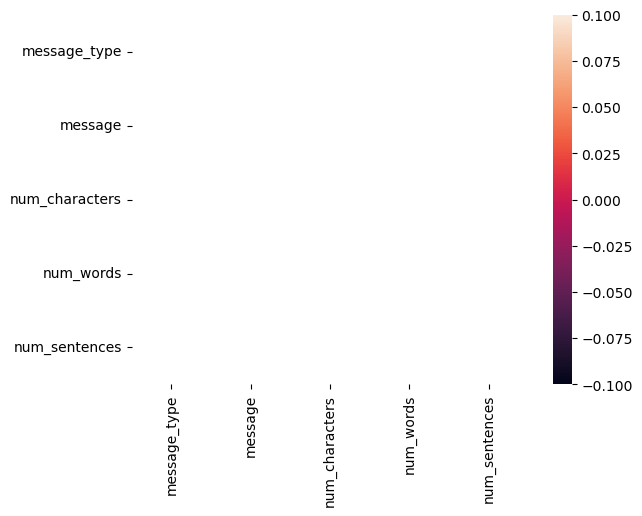

In [50]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

## Preprocessing

In [53]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)#tokenization  and after that text is converted to a list
    #so we run a loop in the message text
    y=[] #creating empty list to append
    for i in message:
        if i.isalnum():
            y.append(i)
    #now lets assign the y list back to the message
    #message = y   !!!!list can never be copied this way it is immutable data type so we have to do it by CLONING
    message=y[:]
    y.clear() #now y is cleared

    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    ##now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)#returns in the form of string

In [63]:
text_transform("THis is a SMS spam CLassifier playing,wasn't $3000")
#see here the special character $ is ignored , no stopwords and no punctuation

'sm spam classifi play 3000'

In [55]:
## Removing stop words and punctuations
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) #length of stopwords available

179

In [56]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
##stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('playing')

#we got the stemmed version of the word

'play'

Text transformation

In [58]:
df['message'].apply(text_transform)
df['transformed_msg']=df['message'].apply(text_transform)
df.head()

,message_type,message,num_characters,num_words,num_sentences,transformed_msg


Word cloud

In [61]:
#drawing a word cloud of maximum occuring words in the messages
from wordcloud import WordCloud
#create its object
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [64]:
##word cloud for SPAM
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
#display the word cloud---SPAM
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [ ]:
## word cloud for ham messages
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=" "))

In [ ]:
#show the wordcloud for ham messages
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

In [ ]:
##finding the top 30 words used in Ham and spam
##lets write a custom code for this
df[df['message_type']==1]['transformed_msg'].tolist()

In [ ]:
##Lets print all the spam messages
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
 len(spam_corpus)

In [ ]:
## now lets find the most occuring words
from collections import Counter
Counter(spam_corpus)
#Top 30
Counter(spam_corpus).most_common(30)

In [ ]:
spam_corpus=[]
for msg in df[df['message_type']==1]['message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#Vectorization

In [ ]:
##Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
## toarray to convert from sparse array to dense array
X=cv.fit_transform(df['transformed_msg']).toarray()
X.shape

In [ ]:
y=df['message_type'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

#TFIDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['transformed_msg']).toarray()

Model improvement

In [ ]:
X.shape

In [ ]:
y=df['message_type'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

In [ ]:
#precision score 1. no false positive

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
input_data=input('Enter your text:')

In [ ]:
#prediction=mnb.predict(input_data)

#saving the trained model

In [ ]:
#classifier=MultinomialNB()

In [ ]:
import pickle
filename='trained_model.sav'
pickle.dump(mnb,open(filename,'wb'))

In [ ]:
#import pickle
#pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#.dump(mnb,open('model.pkl','wb'))

loading the save model

In [ ]:
loaded_model=pickle.load(open('trained_model.sav','rb'))